In [180]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import display,HTML

### DATA SOURCE
```
First download the data files from:
"http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time"
Year: 
2004 to 2014

and selected the Florida as my target state to review the ontime report.
Then, put them together with 1 header 
Read file
```

In [183]:
df = pd.read_csv('FL_2004_2014_ontime_report.csv')
# df.describe()
#df
pd.options.display.max_columns = None
display(df)

,YEAR,MONTH,DAY_OF_MONTH,CARRIER,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 21
0,2004,12,1,AA,203,MCO,"Orlando, FL",LAX,"Los Angeles, CA",-4,-16,0,0,316,302,2217,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,12,2,AA,203,MCO,"Orlando, FL",LAX,"Los Angeles, CA",-3,-6,0,0,325,311,2217,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,12,3,AA,203,MCO,"Orlando, FL",LAX,"Los Angeles, CA",-4,23,0,0,355,314,2217,0,0,23,0,0,NaN
3,2004,12,4,AA,203,MCO,"Orlando, FL",LAX,"Los Angeles, CA",-2,7,0,0,337,316,2217,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,12,5,AA,203,MCO,"Orlando, FL",LAX,"Los Angeles, CA",-2,14,0,0,344,325,2217,NaN,NaN,NaN,NaN,NaN,NaN
5,2004,12,6,AA,203,MCO,"Orlando, FL",LAX,"Los Angeles, CA",-3,0,0,0,331,306,2217,NaN,NaN,NaN,NaN,NaN,NaN
6,2004,12,7,AA,203,MCO,"Orlando, FL",LAX,"Los Angeles, CA",-4,4,0,0,336,316,2217,NaN,NaN,NaN,NaN,NaN,NaN
7,2004,12,8,AA,203,MCO,"Orlando, FL",LAX,"Los Angeles, CA",-3,-10,0,0,321,296,2217,NaN,NaN,NaN,NaN,NaN,NaN
8,2004,12,9,AA,203,MCO,"Orlando, FL",LAX,"Los Angeles, CA",-1,-18,0,0,311,291,2217,NaN,NaN,NaN,NaN,NaN,NaN
9,2004,12,10,AA,203,MCO,"Orlando, FL",LAX,"Los Angeles, CA",-3,-29,0,0,302,285,2217,NaN,NaN,NaN,NaN,NaN,NaN


### Describing trends
```
For the first story, I am so curious in last 10 years:
    -How every airline carrier who departure from Miami perform in each day in December?
    -Does wheather impact the delay most?
    -Does Christmas is the bad time to leave Miami and go travel? 
    -If not, then when is the worst time in Decemeber to leave Miami?
I choose the median of each carriers' ARR_Dealy.
(ARR_DELAY: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.)
```

In [185]:
we_need_u = df[df['ORIGIN'] == 'MIA'][["CARRIER","ARR_DELAY","DAY_OF_MONTH"]]
we_need_u

,CARRIER,ARR_DELAY,DAY_OF_MONTH
62,AA,-5,1
63,AA,11,2
64,AA,14,3
65,AA,34,4
66,AA,20,5
67,AA,25,6
68,AA,44,7
69,AA,15,8
70,AA,25,9
71,AA,NaN,10


In [195]:
meanmean = we_need_u.groupby( ["CARRIER","DAY_OF_MONTH"] ).median().reset_index()
display( HTML( meanmean.to_html() ) )

,CARRIER,DAY_OF_MONTH,ARR_DELAY
0,9E,4,296.0
1,9E,11,33.0
2,9E,18,34.5
3,9E,19,40.0
4,9E,20,-1.0
5,9E,21,153.0
6,9E,23,12.0
7,9E,24,-13.0
8,9E,25,-16.5
9,9E,26,8.0


In [196]:
set(meanmean["CARRIER"])

{'9E',
 'AA',
 'AS',
 'CO',
 'DL',
 'EV',
 'F9',
 'FL',
 'HP',
 'MQ',
 'NW',
 'OH',
 'OO',
 'RU',
 'TZ',
 'UA',
 'US',
 'XE',
 'YV'}

In [197]:
carrierlist = []
for carrier in sorted(list(set(meanmean["CARRIER"]))):
    car = meanmean[ meanmean["CARRIER"]==carrier ]["ARR_DELAY"].reset_index( drop=True )
    car.name = carrier
    carrierlist.append( car )  
# car9e = meanmean[ meanmean["CARRIER"]=="9E" ]["ARR_DELAY"].reset_index( drop=True )
# car9e.name = "9E"
# caraa = meanmean[ meanmean["CARRIER"]=="AA" ]["ARR_DELAY"].reset_index( drop=True )
# caraa.name = "AA"
allcar = pd.concat( carrierlist,axis=1 )
allcar.columns = sorted(allcar.columns)

allcar = allcar.reset_index()
allcar["index"] = allcar["index"].apply( lambda x: x+1 )
allcar = allcar.set_index( "index" )
allcar

,9E,AA,AS,CO,DL,EV,F9,FL,HP,MQ,NW,OH,OO,RU,TZ,UA,US,XE,YV
index,,,,,,,,,,,,,,,,,,,
1,296.0,-1,-3.0,4.0,-4.0,-4.0,33.0,6.5,6.0,-2.0,1.0,-2.0,3,-13.0,-4.0,-3.0,-4.5,0.0,-7.0
2,33.0,-2,3.0,0.0,-3.0,-11.0,118.0,0.0,2.0,-2.0,-6.0,1.5,-4,34.0,-7.5,-7.0,-2.5,3.0,-8.0
3,34.5,-2,1.5,-4.5,-4.0,-3.0,106.0,0.0,-2.0,-2.0,-1.0,-1.5,26,4.5,-26.0,-7.0,-5.0,-6.5,-12.0
4,40.0,-1,-12.0,0.0,-4.0,-5.0,74.5,-4.0,14.0,0.0,7.0,1.5,33,-4.0,-6.5,-3.5,-4.0,10.5,-16.0
5,-1.0,-1,-2.5,4.0,0.0,-9.0,67.0,-3.0,17.0,-1.0,6.0,-1.5,-24,10.0,-10.5,-2.0,-4.0,6.5,-9.0
6,153.0,-1,5.5,2.0,-3.0,-2.0,-7.5,0.0,16.0,0.0,-0.5,0.0,1,-6.5,38.0,-4.5,-5.0,-5.0,-16.0
7,12.0,0,-7.0,4.0,-5.0,-13.0,75.5,3.0,16.0,-3.0,-2.0,2.0,-7,-11.0,-20.0,-3.0,-4.0,12.5,-22.0
8,-13.0,-2,-6.0,-5.0,-4.0,-8.0,32.5,2.0,2.0,-5.0,6.5,1.0,21,5.0,-10.0,-7.0,-7.0,0.0,-15.0
9,-16.5,-1,-10.5,1.0,-4.0,-8.0,56.0,4.0,1.0,1.0,-1.0,3.0,-14,-3.0,-13.5,-5.0,-3.0,0.0,-22.0


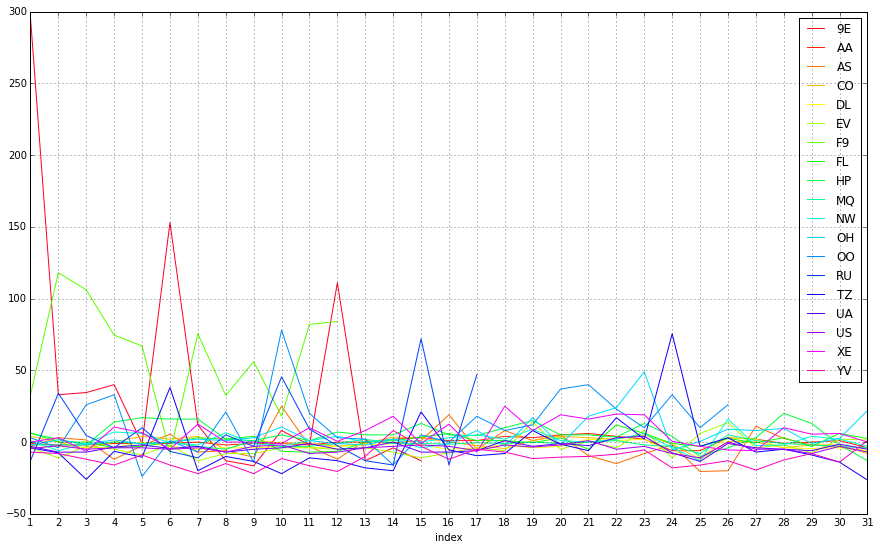

In [199]:
allcar[allcar.columns[:]].plot( figsize=[15,9],xticks=allcar.index.values,colormap='gist_rainbow' )

### Needles in haystacks
```
The second story is based on my own curious about the weather influence may affect the flight performance. 
As we all know, Miami is always considered as a sunny city and provides better weather condition for departure especially in December. To use control variable method, I choose Miami to control the departure weather condition.

And try to find which flight route departure from Miami to the destination may be affected by weather most, I sort 2004-2014 December data by ARR_DELAY (Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers). The first 20 results show the flight route and delay details.
```

In [154]:
display(df_mia.sort('WEATHER_DELAY', ascending=False).head(20))

,YEAR,MONTH,DAY_OF_MONTH,CARRIER,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 21
661708,2012,12,15,MQ,3521,MIA,"Miami, FL",JAX,"Jacksonville, FL",697,689,0,0,67,53,335,0,689,0,0,0,NaN
661701,2012,12,8,MQ,3521,MIA,"Miami, FL",JAX,"Jacksonville, FL",656,670,0,0,89,56,335,0,656,14,0,0,NaN
281559,2007,12,15,MQ,4515,MIA,"Miami, FL",XNA,"Fayetteville, AR",648,648,0,0,180,165,1100,0,648,0,0,0,NaN
395374,2009,12,19,AA,1520,MIA,"Miami, FL",PHL,"Philadelphia, PA",675,664,0,0,154,128,1013,0,643,0,0,21,NaN
393996,2009,12,19,AA,1260,MIA,"Miami, FL",LGA,"New York, NY",647,642,0,0,165,133,1097,0,642,0,0,0,NaN
661702,2012,12,9,MQ,3521,MIA,"Miami, FL",JAX,"Jacksonville, FL",641,634,0,0,68,52,335,0,634,0,0,0,NaN
281179,2007,12,15,MQ,4454,MIA,"Miami, FL",IND,"Indianapolis, IN",632,620,0,0,163,143,1021,0,620,0,0,0,NaN
393721,2009,12,19,AA,1226,MIA,"Miami, FL",LGA,"New York, NY",668,632,0,0,139,124,1097,0,600,0,0,32,NaN
12043,2004,12,26,AA,2278,MIA,"Miami, FL",JFK,"New York, NY",751,752,0,0,168,137,1090,0,549,1,0,202,NaN
321720,2008,12,19,AA,1640,MIA,"Miami, FL",BOS,"Boston, MA",496,542,0,0,221,194,1258,0,496,46,0,0,NaN


In [155]:
display(df_mia.sort('ARR_DELAY', ascending=False).head(20))

,YEAR,MONTH,DAY_OF_MONTH,CARRIER,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 21
3335,2004,12,21,AA,869,MIA,"Miami, FL",SJU,"San Juan, PR",1096,1095,0,0,147,127,1045,865,0,0,0,230,NaN
617927,2012,12,23,AA,530,MIA,"Miami, FL",JFK,"New York, NY",1055,1035,0,0,160,138,1089,681,0,0,0,354,NaN
1539,2004,12,28,AA,513,MIA,"Miami, FL",SJU,"San Juan, PR",962,968,0,0,150,127,1045,711,0,6,0,251,NaN
163414,2006,12,13,AA,1945,MIA,"Miami, FL",DFW,"Dallas/Fort Worth, TX",939,933,0,0,184,159,1121,933,0,0,0,0,NaN
1020,2004,12,23,AA,428,MIA,"Miami, FL",DCA,"Washington, DC",921,916,0,0,145,113,920,733,0,0,0,183,NaN
324545,2008,12,27,AA,2202,MIA,"Miami, FL",JFK,"New York, NY",881,880,0,0,174,145,1090,744,0,0,0,136,NaN
361666,2008,12,27,NW,1145,MIA,"Miami, FL",MEM,"Memphis, TN",858,854,0,0,151,121,860,854,0,0,0,0,NaN
324964,2008,12,16,AS,17,MIA,"Miami, FL",SEA,"Seattle, WA",810,811,0,0,406,383,2724,810,0,1,0,0,NaN
11690,2004,12,20,AA,2224,MIA,"Miami, FL",BOS,"Boston, MA",794,779,0,0,173,154,1258,571,0,0,0,208,NaN
12043,2004,12,26,AA,2278,MIA,"Miami, FL",JFK,"New York, NY",751,752,0,0,168,137,1090,0,549,1,0,202,NaN


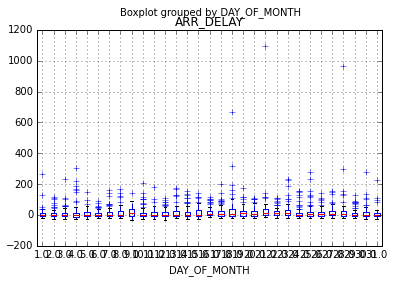

In [165]:
###MIA TO Puerto Rico
##AIRPORT:SJU
df_mia = df[df['ORIGIN'] == 'MIA']
#df_mia
mia_to_sju = df_mia[df_mia['DEST'] == 'SJU']
# mia_to_sju
mia_to_sju.boxplot('ARR_DELAY', by='DAY_OF_MONTH')

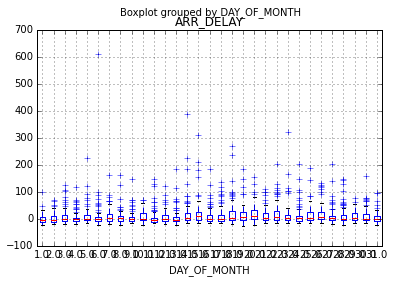

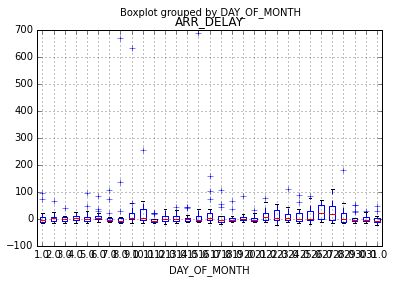

In [157]:
###MIA TRAVEL WITHIN FLORIDA
##AIRPORT:MCO/JAX

df_mia = df[df['ORIGIN'] == 'MIA']
# df_mia
mia_to_mco = df_mia[df_mia['DEST'] == 'MCO']
# mia_to_mco
mia_to_mco.boxplot('ARR_DELAY', by='DAY_OF_MONTH')

df_mia = df[df['ORIGIN'] == 'MIA']
# df_mia
mia_to_jax = df_mia[df_mia['DEST'] == 'JAX']
# mia_to_jax
mia_to_jax.boxplot('ARR_DELAY', by='DAY_OF_MONTH')

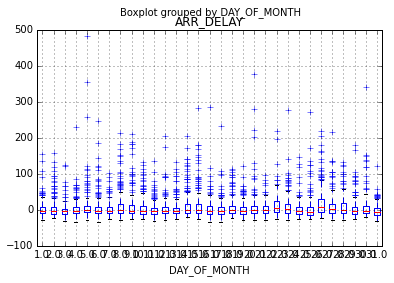

In [158]:
###MIA TO GEORGIA
##AIRPORT: ATL

df_mia = df[df['ORIGIN'] == 'MIA']
# df_mia
mia_to_atl = df_mia[df_mia['DEST'] == 'ATL']
# mia_to_atl
mia_to_atl.boxplot('ARR_DELAY', by='DAY_OF_MONTH')

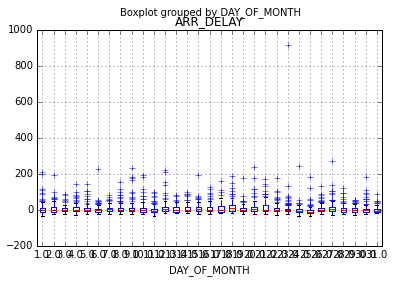

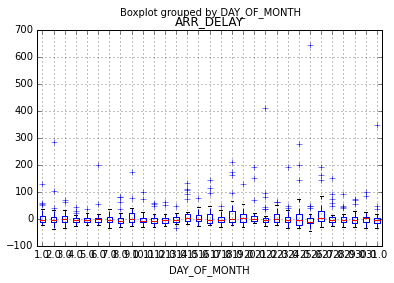

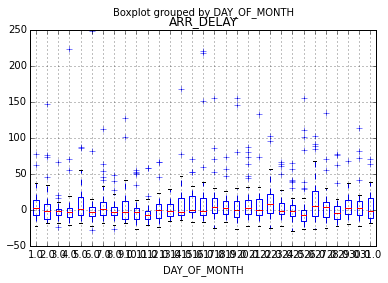

In [159]:
###MIA TO VIRGINIA
##AIRPORT: DCA/IAD/BWI

df_mia = df[df['ORIGIN'] == 'MIA']
# df_mia
mia_to_dca = df_mia[df_mia['DEST'] == 'DCA']
# mia_to_dca
mia_to_dca.boxplot('ARR_DELAY', by='DAY_OF_MONTH')

df_mia = df[df['ORIGIN'] == 'MIA']
# df_mia
mia_to_iad = df_mia[df_mia['DEST'] == 'IAD']
# mia_to_iad
mia_to_iad.boxplot('ARR_DELAY', by='DAY_OF_MONTH')

df_mia = df[df['ORIGIN'] == 'MIA']
# df_mia
mia_to_bwi = df_mia[df_mia['DEST'] == 'BWI']
# mia_to_bwi
mia_to_bwi.boxplot('ARR_DELAY', by='DAY_OF_MONTH')

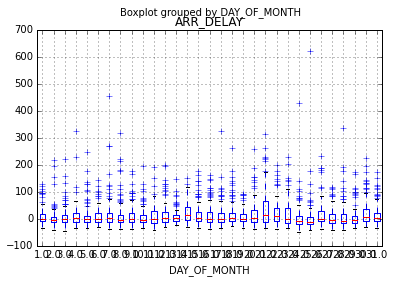

In [160]:
###MIA TO CHICAGO
##AIRPORT: ORD

df_mia = df[df['ORIGIN'] == 'MIA']
df_mia
mia_to_ord = df_mia[df_mia['DEST'] == 'ORD']
# mia_to_ord
mia_to_ord.boxplot('ARR_DELAY', by='DAY_OF_MONTH')

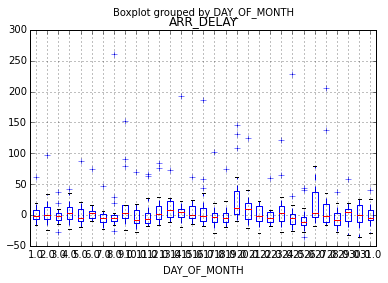

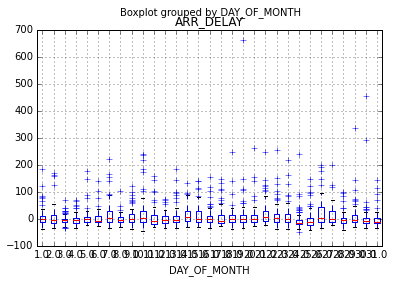

In [161]:
###MIA TO PENNSYLVANIA
##AIRPORT: PIT/PHL

df_mia = df[df['ORIGIN'] == 'MIA']
# df_mia
mia_to_pit = df_mia[df_mia['DEST'] == 'PIT']
# mia_to_pit
mia_to_pit.boxplot('ARR_DELAY', by='DAY_OF_MONTH')

df_mia = df[df['ORIGIN'] == 'MIA']
# df_mia
mia_to_phl = df_mia[df_mia['DEST'] == 'PHL']
# mia_to_phl
mia_to_phl.boxplot('ARR_DELAY', by='DAY_OF_MONTH')

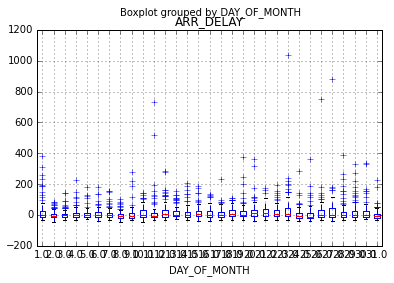

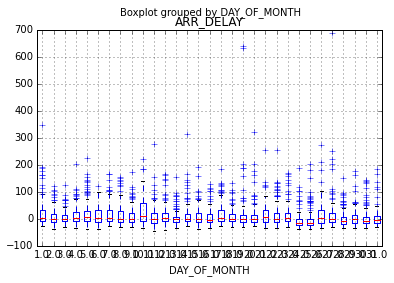

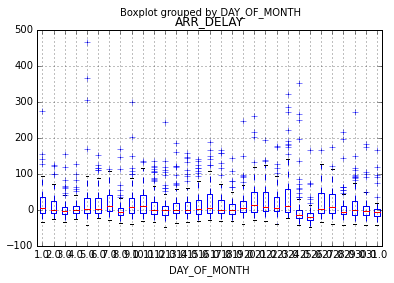

In [162]:
###MIA TO NEW YORK CITY
##AIRPORT: JFK/LGA/EWR

df_mia = df[df['ORIGIN'] == 'MIA']
# df_mia
mia_to_jfk = df_mia[df_mia['DEST'] == 'JFK']
# mia_to_jfk
mia_to_jfk.boxplot('ARR_DELAY', by='DAY_OF_MONTH')

df_mia = df[df['ORIGIN'] == 'MIA']
# df_mia
mia_to_lga = df_mia[df_mia['DEST'] == 'LGA']
# mia_to_lga
mia_to_lga.boxplot('ARR_DELAY', by='DAY_OF_MONTH')

df_mia = df[df['ORIGIN'] == 'MIA']
# df_mia
mia_to_ewr = df_mia[df_mia['DEST'] == 'EWR']
# mia_to_ewr
mia_to_ewr.boxplot('ARR_DELAY', by='DAY_OF_MONTH')

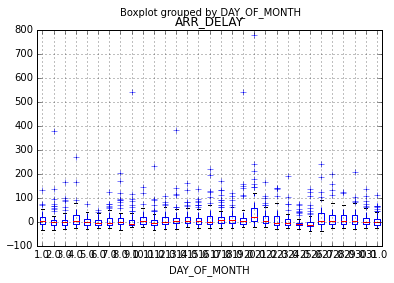

In [163]:
###MIA TO MA
##AIRPORT: BOS

df_mia = df[df['ORIGIN'] == 'MIA']
# df_mia
mia_to_bos = df_mia[df_mia['DEST'] == 'BOS']
# mia_to_bos
mia_to_bos.boxplot('ARR_DELAY', by='DAY_OF_MONTH')

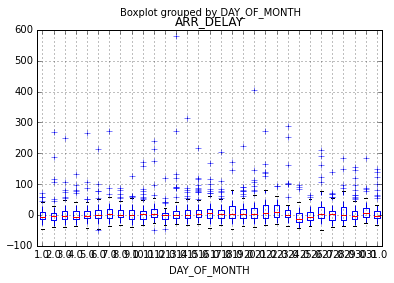

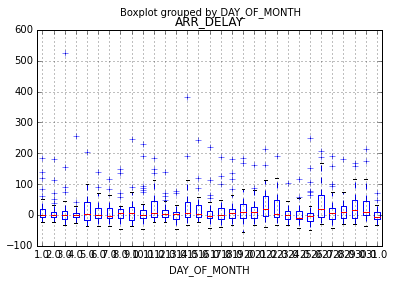

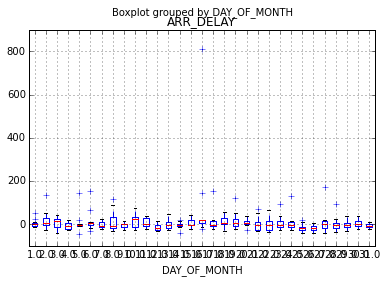

In [164]:
###MIA TO CA
##AIRPORT: LAX/SFO

df_mia = df[df['ORIGIN'] == 'MIA']
# df_mia
mia_to_lax = df_mia[df_mia['DEST'] == 'LAX']
# mia_to_lax
mia_to_lax.boxplot('ARR_DELAY', by='DAY_OF_MONTH')

df_mia = df[df['ORIGIN'] == 'MIA']
# df_mia
mia_to_sfo = df_mia[df_mia['DEST'] == 'SFO']
# mia_to_sfo
mia_to_sfo.boxplot('ARR_DELAY', by='DAY_OF_MONTH')


###MIA TO SEATTLE
##AIRPORT: SEA

df_mia = df[df['ORIGIN'] == 'MIA']
# df_mia
mia_to_sea = df_mia[df_mia['DEST'] == 'SEA']
# mia_to_sea
mia_to_sea.boxplot('ARR_DELAY', by='DAY_OF_MONTH')